## Coding Challenge #3

In this coding challenge, we will use Spearman's Rank to find the correlation between **categorical, non-linearly related and non-normally distributed variables**. You will gain exposure to 2 key concepts:

1) Spearman's Rank Correlation

2) Chi-Square tables (The Chi-Square method was covered in the "Goodness Of Fit" module. As a pre-requisite to this coding challenge, those models should be reviewed to understand the Chi-Square method)

As a guideline:

If the p-value is < 0.05 then you reject the null hypothesis and conclude that the variables are **correlated**

If the p-value is > 0.05 then you cannot reject the null hypothesis and conclude that the variables are **independent**

When computing Spearman's Rank Correlation, you have to ensure the following:

a) The variables/attributes are numeric and able to be bucketed into categories

b) The variables are related non-lineraly

c) The variables are non-normally distibuted


Given this background on Spearman's Rank Correlation, there are 3 main objectives you need to accomplish:

1) Construct a Scatter Plot of cyl versus am, gear and carb (i.e. 3 different scatter plots) to verify thatthe variables are related non-lineraly and and are not-normally distributed. *A visual examination of the data proves that cycl, am, gear and carb are numeric variables that can be placed in categories.*

2) Compute the Spearman's Rank Correlation Coefficient

3) Conduct the Chi-Square test to ascertain how the 'cyl' variable is related to am, gear and carb


**Dataset to be used**: mtcars dataset that we have used in one of the previous sessions. The dataset is accessible via the following link:

https://gist.github.com/seankross/a412dfbd88b3db70b74b






In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, chi2_contingency

In [0]:
data = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

In [3]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Confirming Nonlinearity and Non-normal Distributions

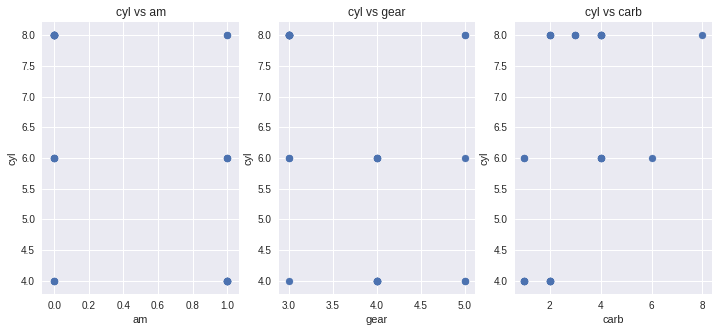

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

for ix, d in enumerate(['am', 'gear', 'carb']):
    axs[ix].scatter(y=data['cyl'], x=data[d])
    axs[ix].set(title='cyl vs {}'.format(d), ylabel='cyl', xlabel=d)

None of the variables in question are related linearly to `'cyl'`.

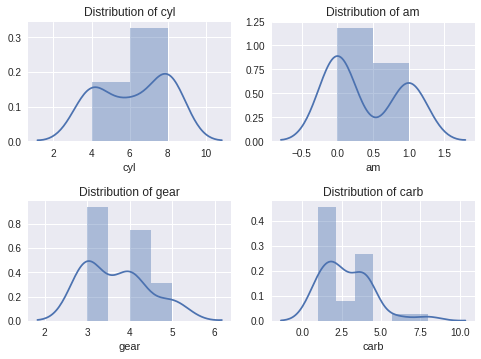

In [17]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5)

for ix, d in enumerate(['cyl', 'am', 'gear', 'carb']):
    x = ix // 2
    y = ix % 2
    
    sns.distplot(data[d], ax=axs[x,y])
    axs[x,y].set(title='Distribution of {}'.format(d))

None of the variables appear to be normally distributed, though there is little data with which to make estimates of the distributions.

## Spearman's Rank Correlation

In [24]:
M = data[['cyl', 'am', 'gear', 'carb']].as_matrix()

rho, pval = spearmanr(M)
print(rho, '\n', pval)

[[ 1.         -0.52207118 -0.56431047  0.58006798]
 [-0.52207118  1.          0.807688   -0.06436525]
 [-0.56431047  0.807688    1.          0.11488698]
 [ 0.58006798 -0.06436525  0.11488698  1.        ]] 
 [[7.44413602e-232 2.17804644e-003 7.67820884e-004 5.01664321e-004]
 [2.17804644e-003 0.00000000e+000 2.30406284e-008 7.26352356e-001]
 [7.67820884e-004 2.30406284e-008 0.00000000e+000 5.31235752e-001]
 [5.01664321e-004 7.26352356e-001 5.31235752e-001 7.44413602e-232]]


The rank correlation coefficient for `'cyl'` with the other variables is given by the first column/row of the correlation matrix. The associated column of the p-value matrix contains the results of a hypothesis test, showing the probability that two uncorrelated variables would result in the corresponding correlation coefficient obtained.

In [0]:
rho_cyl_am, p_cyl_am = rho[0, 1], pval[0, 1]
rho_cyl_gear, p_cyl_gear = rho[0, 2], pval[0, 2]
rho_cyl_carb, p_cyl_carb = rho[0, 3], pval[0, 3]

In [32]:
correlation = pd.DataFrame([[rho_cyl_am, rho_cyl_gear, rho_cyl_carb], [p_cyl_am, p_cyl_gear, p_cyl_carb]]).T
correlation.columns = ['Coefficient', 'p-value']
correlation.index = ['cyl-am', 'cyl-gear', 'cyl-carb']
correlation

,Coefficient,p-value
cyl-am,-0.522071,0.002178
cyl-gear,-0.564310,0.000768
cyl-carb,0.580068,0.000502


## Pearson's Chi-Squared Test

[Pearson's chi-squared test](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test) can assess whether unpaired observations of two categorical variables are independent, when they are expressed in a contingency table. [pd.crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) can easily construct contingency tables.

In [0]:
cont_cyl_am = pd.crosstab(data['cyl'], data['am'])
cont_cyl_gear = pd.crosstab(data['cyl'], data['gear'])
cont_cyl_carb = pd.crosstab(data['cyl'], data['carb'])

In [43]:
cont_cyl_am

am,0,1
cyl,,
4,3,8
6,4,3
8,12,2


In [50]:
chi2_am, p_am = chi2_contingency(cont_cyl_am)[0:2]
chi2_gear, p_gear = chi2_contingency(cont_cyl_gear)[0:2]
chi2_carb, p_carb = chi2_contingency(cont_cyl_carb)[0:2]

chisquare = pd.DataFrame([[chi2_am, chi2_gear, chi2_carb], [p_am, p_gear, p_carb]]).T
chisquare.columns = ['Chi-Square', 'p-value']
chisquare.index = ['cyl-am', 'cyl-gear', 'cyl-carb']
chisquare

,Chi-Square,p-value
cyl-am,8.740733,0.012647
cyl-gear,18.036364,0.001214
cyl-carb,24.388868,0.006632


With 2 degrees of freedom, a chi-square statistic greater than 5.99 corresponds to a p-value of 0.05, while a statistic greater than 9.21 coresponds to a p-value below 0.01.

This is consistent with our results, and we can reject the null hypotheses that `cyl` is independent of `am`, that `cyl` is independent of `gear`, and that `cyl` is independent of `carb`